In [1]:
from document_pipeline import DocumentPipeline
import leidenalg
import igraph as ig

In [2]:
pipeline = DocumentPipeline()

In [3]:
pipeline.load("storage/run2")

In [4]:
pipeline.run("storage/run2/config.json")

Triplet handler created with 59 nodes and 61 edges.


Starting DFS from node 1 with mid nodes [] and end nodes [0]
[1, 2, 3, 6, 3, 2, 1, 5, 1, 0, 4, 0, 7, 0]
Starting DFS from node 7 with mid nodes [] and end nodes [7]
[7, 1, 0, 1, 2, 1, 3, 1, 4, 1, 5, 1, 6, 1, 7]
Starting DFS from node 0 with mid nodes [] and end nodes [6]
[0, 1, 2, 1, 3, 4, 3, 1, 5, 7, 5, 6, 8, 9, 8, 6, 10, 6]
Starting DFS from node 1 with mid nodes [[1]] and end nodes [1]
[1, 0, 1, 2, 1, 3, 1, 4, 1, 5, 6, 5, 1, 7, 8, 7, 1]
Starting DFS from node 5 with mid nodes [] and end nodes [5]
[5, 3, 0, 1, 2, 1, 0, 4, 0, 3, 5, 6, 5]
Starting DFS from node 0 with mid nodes [] and end nodes [0]
[0, 4, 2, 1, 3, 1, 2, 5, 2, 6, 2, 7, 2, 4, 0]
Starting DFS from node 0 with mid nodes [] and end nodes []
[0, 1, 2, 1, 0, 3]
Starting DFS from node 0 with mid nodes [] and end nodes []
[0, 1]
Starting DFS from node 0 with mid nodes [] and end nodes []
[0, 1]


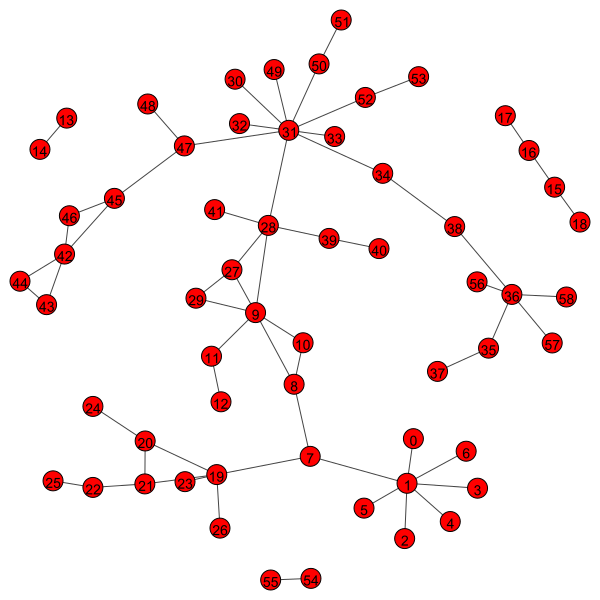

In [5]:
import igraph as ig
import matplotlib.pyplot as plt

# Create an undirected graph
g = pipeline.triplet_handler._graph
g.vs["label"] = [str(i) for i in range(g.vcount())]
layout = g.layout("fr")
ig.plot(g, layout=layout, vertex_label=g.vs["label"])

In [6]:
traversal_path = pipeline.triplet_handler.global_traversal
parent_nodes = pipeline.triplet_handler.global_traversal_parents
print(traversal_path)
print(parent_nodes)

[20, 21, 22, 25, 24, 19, 23, 26, 19, 7, 1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 27, 29, 28, 39, 40, 41, 28, 31, 30, 32, 33, 49, 50, 51, 52, 53, 31, 47, 45, 42, 43, 44, 46, 48, 47, 34, 38, 36, 35, 37, 56, 57, 58, 34, 54, 55, 15, 16, 17, 18, 13, 14]
[-1, 20, 21, 22, 20, 20, 19, 19, 26, 19, 7, 1, 1, 1, 1, 1, 1, 1, 7, 8, 9, 9, 11, 9, 27, 27, 28, 39, 28, 41, 28, 31, 31, 31, 31, 31, 50, 31, 52, 52, 31, 47, 45, 42, 43, 42, 47, 48, 47, 34, 38, 36, 35, 36, 36, 36, 38, 34, 54, 55, 15, 16, 15, 18, 13]


Starting node: 20
[20, 21, 22, 25, 24, 19, 23, 26, 19, 7, 1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 27, 29, 28, 39, 40, 41, 28, 31, 30, 32, 33, 49, 50, 51, 52, 53, 31, 47, 45, 42, 43, 44, 46, 48, 47, 34, 38, 36, 35, 37, 56, 57, 58, 34, 54, 55, 15, 16, 17, 18, 13, 14]
[-1, 20, 21, 22, 20, 20, 19, 19, 26, 19, 7, 1, 1, 1, 1, 1, 1, 1, 7, 8, 9, 9, 11, 9, 27, 27, 28, 39, 28, 41, 28, 31, 31, 31, 31, 31, 50, 31, 52, 52, 31, 47, 45, 42, 43, 42, 47, 48, 47, 34, 38, 36, 35, 36, 36, 36, 38, 34, 54, 55, 15, 16, 15, 18, 13]


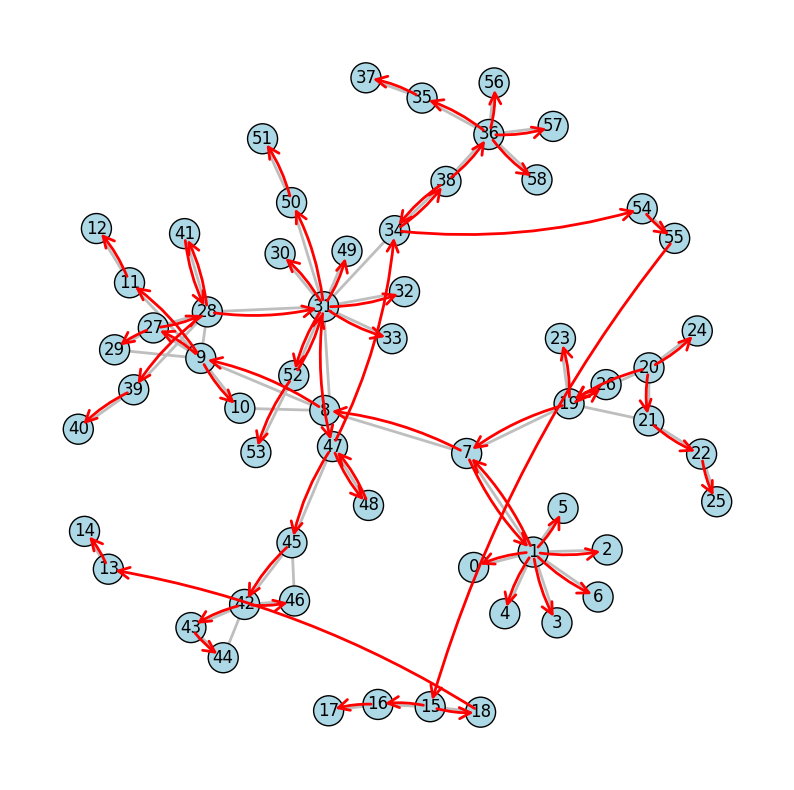

In [8]:
import igraph as ig
import matplotlib.pyplot as plt

# Create an undirected graph
g = pipeline.triplet_handler._graph
g.vs["label"] = [str(i) for i in range(g.vcount())]

# Example traversal path and parent list
traversal_path = pipeline.triplet_handler.global_traversal
parent_nodes = pipeline.triplet_handler.global_traversal_parents
print(f"Starting node: {traversal_path[0]}")
print(traversal_path)
print(parent_nodes)
# Highlight the traversal path
# Set default vertex and edge colors
g.vs["color"] = "lightblue"
g.es["color"] = "grey"

# Highlight the edges in the traversal path and add arrows
arrow_edges = []
for i in range(1, len(traversal_path)):
    current_node = traversal_path[i]
    parent_node = parent_nodes[i]
    if parent_node is not None:
        try:
            eid = g.get_eid(parent_node, current_node, directed=False)
            # g.es[eid]["color"] = "red"
            arrow_edges.append((parent_node, current_node))
        except:
            arrow_edges.append((parent_node, current_node))

# Plot the graph
layout = g.layout("fr")

# Basic plot without arrows
ig.plot(g, layout=layout, vertex_label=g.vs["label"], vertex_color=g.vs["color"], edge_color=g.es["color"])

# Add arrows manually using matplotlib for visualization
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figure size here
ig.plot(g, layout=layout, target=ax, vertex_label=g.vs["label"], vertex_color=g.vs["color"], edge_color=g.es["color"])

# Convert layout to a dictionary for easy access
layout_coords = {i: layout[i] for i in range(len(layout))}

# Draw arrows on the graph to indicate traversal order
for start, end in arrow_edges:
    start_coords = layout_coords[start]
    end_coords = layout_coords[end]
    ax.annotate("",
                xy=end_coords, xycoords='data',
                xytext=start_coords, textcoords='data',
                arrowprops=dict(arrowstyle="->", color="red", lw=2,
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.1",
                                mutation_scale=20))  # Adjust mutation_scale for arrowhead size

plt.show()


In [28]:
print(pipeline.triplet_handler.global_traversal)
print(pipeline.triplet_handler.global_traversal_parents)

[20, 21, 22, 25, 24, 19, 23, 26, 19, 7, 1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 27, 29, 28, 39, 40, 41, 28, 31, 30, 32, 33, 49, 50, 51, 52, 53, 31, 47, 45, 42, 43, 44, 46, 48, 47, 34, 38, 36, 35, 37, 56, 57, 58, 34, 54, 55, 15, 16, 17, 18, 13, 14]
[-1, 20, 21, 22, 20, 20, 19, 19, 26, 19, 7, 1, 1, 1, 1, 1, 1, 1, 7, 8, 9, 9, 11, 9, 27, 27, 28, 39, 28, 41, 28, 31, 31, 31, 31, 31, 50, 31, 52, 52, 31, 47, 45, 42, 43, 42, 47, 48, 47, 34, 38, 36, 35, 36, 36, 36, 38, 34, 54, 55, 15, 16, 15, 18, 13]


Graph has 59 vertices.
Starting node: 20


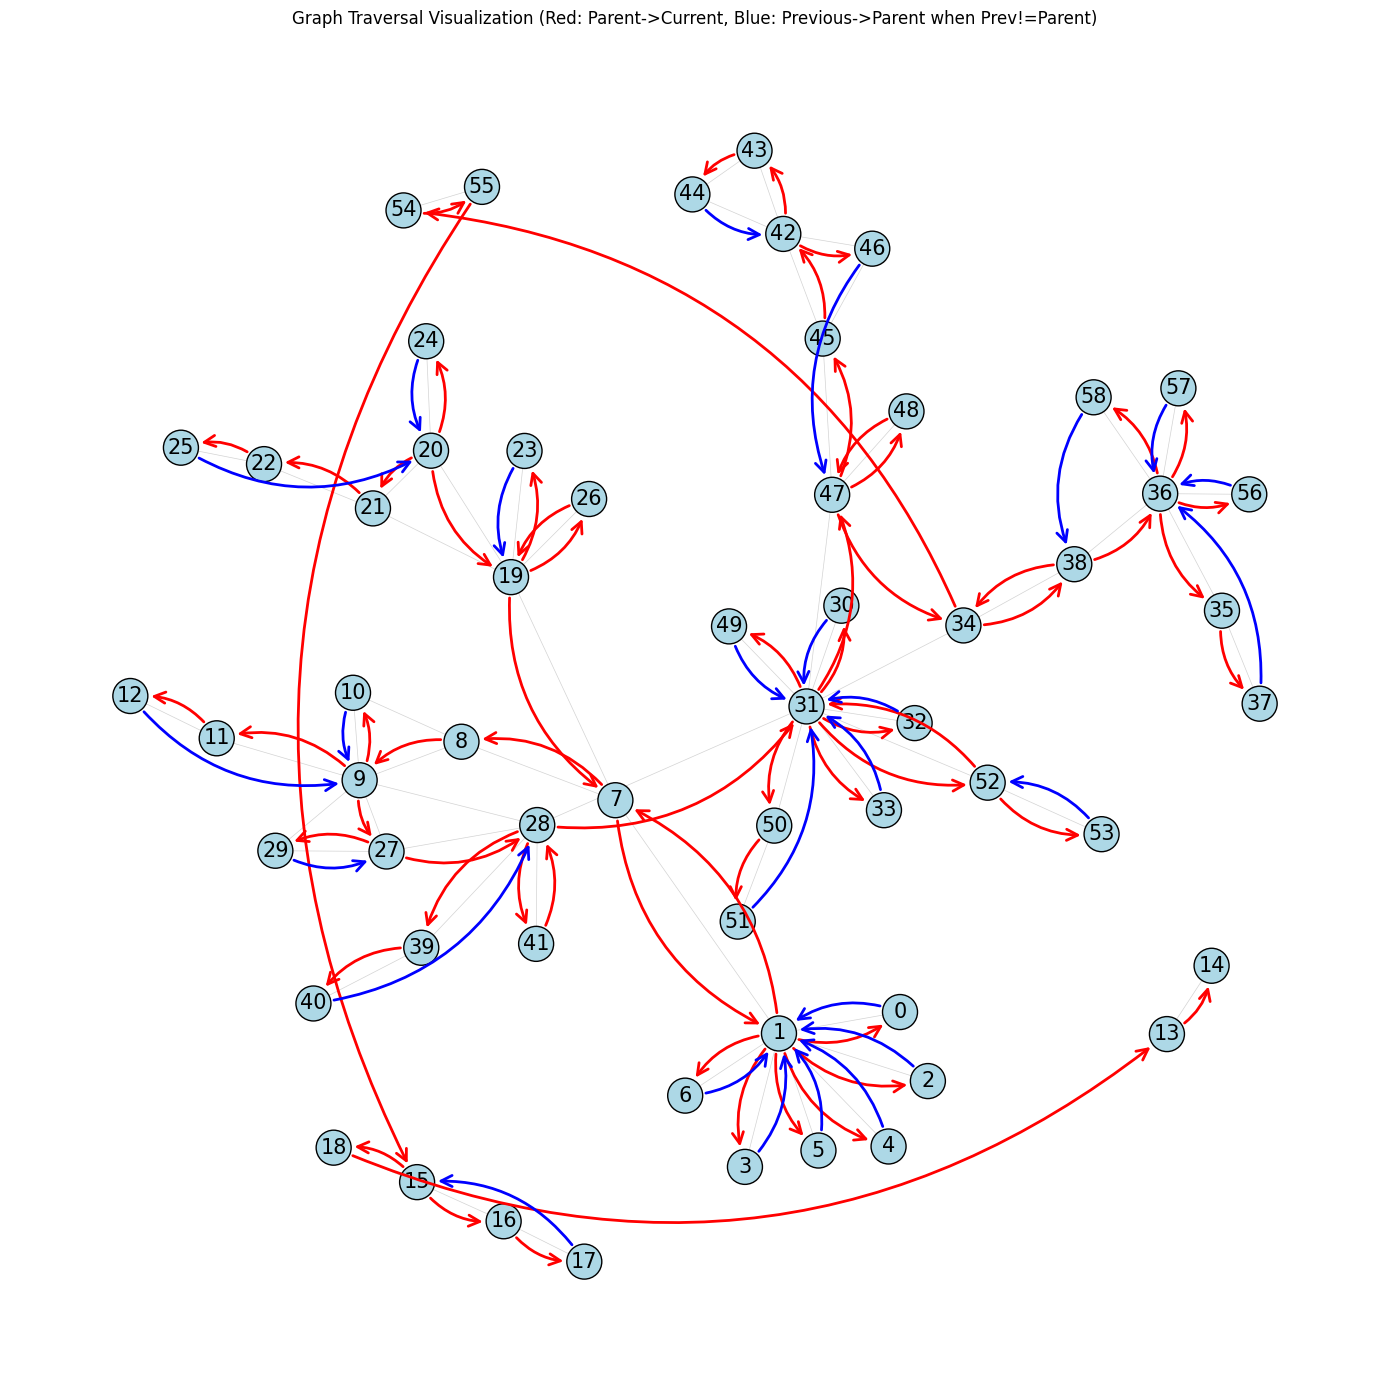

In [ ]:
import igraph as ig
import matplotlib.pyplot as plt

# Assume 'pipeline' is defined and contains the necessary attributes from your environment
# For example:
# pipeline = your_actual_pipeline_object

# --- Start of your original code, slightly modified ---

# Get graph, traversal, and parent information from your pipeline object
# Ensure the pipeline object and its attributes are correctly loaded before this script runs
try:
    g = pipeline.triplet_handler._graph
    traversal_path = pipeline.triplet_handler.global_traversal
    parent_nodes = pipeline.triplet_handler.global_traversal_parents
    for i in range(len(traversal_path) - 1, 0, -1):
        # Check if current node matches the parent of the *previous* node
        if traversal_path[i] == parent_nodes[i - 1]:
            # If they match, remove the element at index i from both lists
            del traversal_path[i]
            del parent_nodes[i]
    print(f"Traversal Path: {traversal_path}")
    print(f"Parent Nodes:   {parent_nodes}")
    

except AttributeError as e:
    print(f"Error accessing pipeline attributes: {e}")
    print("Please ensure the 'pipeline' object is correctly defined and populated.")
    # You might want to raise the error or exit if the data isn't available
    raise

# Ensure graph is not empty
if not g or g.vcount() == 0:
    print("Error: Graph is empty or not loaded correctly.")
    exit()

# Assign vertex labels
g.vs["label"] = [str(i) for i in range(g.vcount())]

# Print for verification (optional)
print(f"Graph has {g.vcount()} vertices.")
print(f"Starting node: {traversal_path[0] if traversal_path else 'N/A'}")
# print(f"Traversal Path: {traversal_path}")
# print(f"Parent Nodes:   {parent_nodes}")
# print("-" * 20)

# --- Highlighting and Arrow Logic ---

# Set default vertex and edge colors
g.vs["color"] = "lightblue"  # Keep the background color relatively light
g.es["color"] = "lightgrey" # Use lightgrey to make arrows stand out more

# Lists to store edges for different arrow types
red_arrow_edges = []  # For standard parent -> child traversal steps
blue_arrow_edges = [] # For previous_node -> parent_node when previous != parent

# --- Logic modification starts here ---
# Iterate through the traversal path starting from the second node
if len(traversal_path) > 1:
    for i in range(1, len(traversal_path)):
        # Ensure index i is valid for both lists
        if i >= len(parent_nodes):
            print(f"Warning: Mismatch between traversal_path and parent_nodes length at index {i}. Skipping step.")
            continue

        current_node = traversal_path[i]
        previous_node = traversal_path[i-1] # Node visited just before current_node
        parent_node = parent_nodes[i]      # Parent of current_node in the traversal structure

        # Validate node indices before proceeding
        nodes_to_check = [current_node, previous_node]
        if parent_node is not None:
            nodes_to_check.append(parent_node)

        valid_indices = True
        for node_index in nodes_to_check:
            if not (isinstance(node_index, int) and 0 <= node_index < g.vcount()):
                print(f"Warning: Invalid node index encountered at step {i}: {node_index}. Skipping step.")
                valid_indices = False
                break
        if not valid_indices:
            continue

        # Add red arrow for the main traversal step (parent -> current)
        if parent_node is not None:
             red_arrow_edges.append((parent_node, current_node))
             # print(f"Step {i}: Curr={current_node}, Prev={previous_node}, Parent={parent_node}. Adding RED arrow {parent_node} -> {current_node}") # Optional debug print

             # Check the condition for the blue arrow: previous node is not the parent
             if previous_node != parent_node:
                 blue_arrow_edges.append((previous_node, parent_node))
                 # print(f"Step {i}: Prev ({previous_node}) != Parent ({parent_node}). Adding BLUE arrow {previous_node} -> {parent_node}") # Optional debug print
        # else:
             # This happens if current_node is a root or its parent is undefined in this context
             # print(f"Step {i}: Curr={current_node}, Prev={previous_node}, Parent=None. No arrows involving parent.") # Optional debug print
else:
    print("Traversal path has less than 2 nodes. No arrows to draw.")
# --- End of logic modification ---


# --- Plotting Section ---

# Calculate layout
layout = g.layout("fr") # Fruchterman-Reingold layout

# Plot with arrows using matplotlib
fig, ax = plt.subplots(figsize=(14, 14))  # Increased figure size for clarity

# Main plot call with updated visual parameters
vertex_node_size = 35 # Increased node size
arrow_shrink_factor = 15 # Adjust shrink based on vertex_size to avoid overlap

ig.plot(g, layout=layout, target=ax,
        vertex_label=g.vs["label"],
        vertex_color=g.vs["color"],
        vertex_size=vertex_node_size,           # <<< Increased node size
        vertex_label_color="black",     # <<< White label color
        vertex_label_size=15,            # Adjust label font size if needed
        edge_color=g.es["color"],
        edge_width=0.5 # Make underlying graph edges thinner
       )

# Convert layout to a dictionary for easy access by node index
layout_coords = {i: layout[i] for i in range(g.vcount())}

# Draw RED arrows (Parent -> Current)
# print("\nDrawing RED arrows:") # Optional debug print
for start, end in red_arrow_edges:
    if start in layout_coords and end in layout_coords:
        start_coords = layout_coords[start]
        end_coords = layout_coords[end]
        # print(f"  Red: {start} -> {end}") # Optional debug print
        ax.annotate("",
                    xy=end_coords, xycoords='data',
                    xytext=start_coords, textcoords='data',
                    arrowprops=dict(arrowstyle="->", color="red", lw=2,
                                    shrinkA=arrow_shrink_factor, # Adjusted shrink
                                    shrinkB=arrow_shrink_factor, # Adjusted shrink
                                    patchA=None, patchB=None,
                                    connectionstyle="arc3,rad=0.3", # <<< Increased curvature
                                    mutation_scale=20)) # Arrow head size
    else:
        print(f"  Skipping Red Arrow: Node(s) not in layout_coords (Start: {start}, End: {end})")


# Draw BLUE arrows (Previous -> Parent, when Previous != Parent)
# print("\nDrawing BLUE arrows:") # Optional debug print
for start, end in blue_arrow_edges:
     if start in layout_coords and end in layout_coords:
        start_coords = layout_coords[start]
        end_coords = layout_coords[end]
        # print(f"  Blue: {start} -> {end}") # Optional debug print
        ax.annotate("",
                    xy=end_coords, xycoords='data',
                    xytext=start_coords, textcoords='data',
                    arrowprops=dict(arrowstyle="->", color="blue", lw=2,
                                    shrinkA=arrow_shrink_factor, # Adjusted shrink
                                    shrinkB=arrow_shrink_factor, # Adjusted shrink
                                    patchA=None, patchB=None,
                                    connectionstyle="arc3,rad=0.3", # <<< Increased curvature (opposite direction)
                                    mutation_scale=20))
     else:
        print(f"  Skipping Blue Arrow: Node(s) not in layout_coords (Start: {start}, End: {end})")


ax.set_title("Graph Traversal Visualization (Red: Parent->Current, Blue: Previous->Parent when Prev!=Parent)")
plt.axis('off') # Hide matplotlib axes
plt.tight_layout()
plt.show()